# 硬投票表决

In [8]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 使用Sklearn中moon数据集

In [9]:
X,y = make_moons(n_samples=7000,noise=0.1)

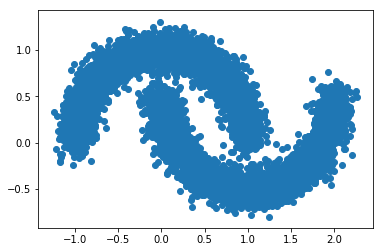

In [10]:
plt.scatter(X[:,0],X[:,1])

### 数据集分割

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=42)

### 定义三个基分类器

In [12]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(probability=True)

### 定义投票分类器

In [13]:
voting = VotingClassifier(
    estimators=[('lr',lr),('rf',dt),('svc',svm)],
    voting='soft'
)

### 输出各个分类器的准确率

In [14]:
for clf in (lr,dt,svm,voting):
    clf.fit(X_train,y_train)
    y_hat = clf.predict(X_test)
    print(clf.__class__.__name__,'=',accuracy_score(y_test,y_hat))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LogisticRegression = 0.8868571428571429
DecisionTreeClassifier = 0.9988571428571429
SVC = 0.9994285714285714


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier = 0.9988571428571429
